## Expected Draws Until First Repeat in an Urn

In [1]:
import numpy as np
import pandas as pd

# Number of distinct balls in the urn
n = 5

# Total number of states: S0 to S5 (transient), plus absorbing state S6
num_states = n + 2  # 0-5 transient, 6 = absorbing

# Initialize the transition matrix
P = np.zeros((num_states, num_states))

# From state 0, always move to state 1 (first ball drawn)
P[0][1] = 1.0

# Fill in transitions for states 1 through 4
for k in range(1, n):
    P[k][k + 1] = (n - k) / n  # probability of new distinct ball
    P[k][n + 1] = k / n        # probability of repeat (absorbing)

# State 5: all balls seen, so next must be a repeat
P[5][n + 1] = 1.0

# Absorbing state
P[6][6] = 1.0

# Create labeled DataFrame for transition matrix visualization
state_labels = [f"S{i}" for i in range(n + 1)] + ["Absorbing"]
transition_df = pd.DataFrame(P, columns=state_labels, index=state_labels)

# Display the transition matrix
print("Transition Matrix:")
print(transition_df)

# Calculate expected number of steps to absorption from each transient state
E = np.zeros(n + 1)
E[n] = 1  # E_5 = 1 (from S5, it takes 1 step to reach absorbing)

# Compute expected values backwards: E_4 to E_0
for k in reversed(range(n)):
    if k == 0:
        E[k] = 1 + E[k + 1]  # from S0, always go to S1
    else:
        E[k] = 1 + ((n - k) / n) * E[k + 1]

# Final result
print(f"\nExpected number of draws until a repeat: {E[0]:.4f}")

Transition Matrix:
            S0   S1   S2   S3   S4   S5  Absorbing
S0         0.0  1.0  0.0  0.0  0.0  0.0        0.0
S1         0.0  0.0  0.8  0.0  0.0  0.0        0.2
S2         0.0  0.0  0.0  0.6  0.0  0.0        0.4
S3         0.0  0.0  0.0  0.0  0.4  0.0        0.6
S4         0.0  0.0  0.0  0.0  0.0  0.2        0.8
S5         0.0  0.0  0.0  0.0  0.0  0.0        1.0
Absorbing  0.0  0.0  0.0  0.0  0.0  0.0        1.0

Expected number of draws until a repeat: 3.5104


## Graph Visualization

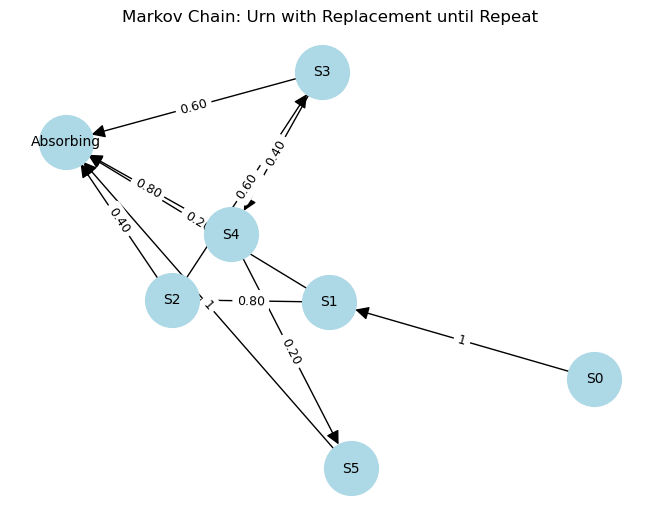

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Define states
states = [f"S{i}" for i in range(6)] + ["Absorbing"]

# Add edges based on transition logic
n = 5
G.add_edge("S0", "S1", label="1")

for k in range(1, n):
    G.add_edge(f"S{k}", f"S{k+1}", label=f"{(n - k)/n:.2f}")
    G.add_edge(f"S{k}", "Absorbing", label=f"{k/n:.2f}")

G.add_edge("S5", "Absorbing", label="1")

# Draw graph
pos = nx.spring_layout(G, seed=42)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=10, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Markov Chain: Urn with Replacement until Repeat")
plt.show()
